In [2]:
%pip install newsapi-python
%pip install --upgrade transformers
%pip install bert-for-sequence-classification
from newsapi import NewsApiClient
import json
import torch
from wordcloud import WordCloud
import pandas as pd
import os
print(torch.__version__)


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: C:\Users\franc\OneDrive\Documents\Admin\Universiteit\Akademies\Year 3\Data Science 346\Project\DS346proj\myenv\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: C:\Users\franc\OneDrive\Documents\Admin\Universiteit\Akademies\Year 3\Data Science 346\Project\DS346proj\myenv\Scripts\python.exe -m pip install --upgrade pip


2.4.1+cpu



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: C:\Users\franc\OneDrive\Documents\Admin\Universiteit\Akademies\Year 3\Data Science 346\Project\DS346proj\myenv\Scripts\python.exe -m pip install --upgrade pip


In [17]:
import os
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure necessary NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()

# Function to preprocess text
def preprocess(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]
    return ' '.join([word for word in words if word not in stop_words])

# Function to load articles from local files
def get_articles():
    # Load Harris articles from local file
    with open('dataset/cleaned_harris_articles.json', 'r') as harris_file:
        harris_articles = json.load(harris_file)

    # Load Trump articles from local file
    with open('dataset/cleaned_trump_articles.json', 'r') as trump_file:
        trump_articles = json.load(trump_file)
    
    # Assuming the structure is already a list of articles in both JSON files
    return harris_articles, trump_articles

# Call the function to get articles
harris_articles, trump_articles = get_articles()

# Preprocess Harris and Trump articles
clean_harris_articles = [preprocess(article.get('content', '')) for article in harris_articles if article.get('content')]
clean_trump_articles = [preprocess(article.get('content', '')) for article in trump_articles if article.get('content')]

# In case the 'content' field is missing, fall back to 'description'
clean_harris_articles += [preprocess(article.get('description', '')) for article in harris_articles if not article.get('content') and article.get('description')]
clean_trump_articles += [preprocess(article.get('description', '')) for article in trump_articles if not article.get('content') and article.get('description')]


# Print some sample articles to verify loading and preprocessing
print(f"Harris Articles: {len(clean_harris_articles)}")
print(f"Trump Articles: {len(clean_trump_articles)}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Harris Articles: 444
Trump Articles: 444


In [18]:
# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

def calculate_sentiment_for_article(article):
    """
    Calculate the total sentiment score for an article.
    """
    sentences = sent_tokenize(article.lower())
    total_score = 0
    
    # Calculate sentiment for each sentence and sum the scores
    for sentence in sentences:
        sentiment = sid.polarity_scores(sentence)
        total_score += sentiment['compound']
    
    return total_score

def process_articles(articles, candidate_name):
    """
    Process all articles for a specific candidate and calculate sentiment scores.
    """
    candidate_data = []
    
    for article in articles:
        # Calculate the total sentiment score for the article
        score = calculate_sentiment_for_article(article)
        
        # Store the result with article and score
        candidate_data.append({
            'article': article,
            'candidate': candidate_name,
            'score': score
        })
    
    return candidate_data

# Process Harris and Trump articles
clean_harris_articles = [preprocess(article.get('content', '')) for article in harris_articles if article.get('content')]
clean_trump_articles = [preprocess(article.get('content', '')) for article in trump_articles if article.get('content')]

# In case the 'content' field is missing, fall back to 'description'
clean_harris_articles += [preprocess(article.get('description', '')) for article in harris_articles if not article.get('content') and article.get('description')]
clean_trump_articles += [preprocess(article.get('description', '')) for article in trump_articles if not article.get('content') and article.get('description')]

# Process each set of articles separately
harris_data = process_articles(clean_harris_articles, "Kamala Harris")
trump_data = process_articles(clean_trump_articles, "Donald Trump")

# Combine both datasets
articles_data = harris_data + trump_data

# Convert to DataFrame
df_articles = pd.DataFrame(articles_data)

# Output the data
print(df_articles)


                                               article      candidate   score
0    shortly following report apparent second assas...  Kamala Harris -0.5994
1    vice president kamala harris ha accepted cnn i...  Kamala Harris  0.7269
2    poll show voter view vice president kamala har...  Kamala Harris  0.3818
3    kamala getty image ul li woman voter could pro...  Kamala Harris  0.0000
4    taylor swift endorsed kamala harris president ...  Kamala Harris  0.7717
..                                                 ...            ...     ...
883  cumming former president donald trump doubled ...   Donald Trump -0.5423
884  welcome online version politics desk evening n...   Donald Trump  0.4588
885  expect peace submitted vincenzo lorusso likely...   Donald Trump  0.8807
886  vice president kamala harris failure appeal ca...   Donald Trump -0.6808
887  please note ourprivacy policy term use cooky a...   Donald Trump  0.3182

[888 rows x 3 columns]


In [19]:

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
from nltk.corpus import wordnet as wn
import pandas as pd
from nltk.tokenize import word_tokenize

# Load the NRC Emotion Lexicon
nrc = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', names=["word", "emotion", "association"])
nrc = nrc.pivot(index='word', columns='emotion', values='association').reset_index()

def get_emotions(text):
    """
    Get the emotion scores for a given text based on the NRC lexicon.
    """
    words = word_tokenize(text.lower())
    emotions = {emotion: 0 for emotion in nrc.columns[1:]}
    
    for word in words:
        if word in nrc['word'].values:
            word_emotions = nrc[nrc['word'] == word].iloc[0, 1:]
            for emotion in word_emotions.index:
                emotions[emotion] += word_emotions[emotion]
    
    return emotions

def process_articles_for_emotions(articles, candidate_name):
    """
    Process a list of articles and calculate the emotion scores for each article.
    """
    articles_emotions = []
    
    for article in articles:
        emotions = get_emotions(article)
        articles_emotions.append({
            'article': article,
            'candidate': candidate_name,
            **emotions  # Unpack the emotion scores into the dictionary
        })
    
    return articles_emotions

# Process Harris and Trump articles for emotions
harris_emotions = process_articles_for_emotions(clean_harris_articles, "Kamala Harris")
trump_emotions = process_articles_for_emotions(clean_trump_articles, "Donald Trump")

# Combine the results into one list
combined_emotions = harris_emotions + trump_emotions

# Convert to DataFrame for easier analysis
df_emotions = pd.DataFrame(combined_emotions)

# Output the dataframe
print(df_emotions)


                                               article      candidate  anger  \
0    shortly following report apparent second assas...  Kamala Harris      1   
1    vice president kamala harris ha accepted cnn i...  Kamala Harris      0   
2    poll show voter view vice president kamala har...  Kamala Harris      0   
3    kamala getty image ul li woman voter could pro...  Kamala Harris      1   
4    taylor swift endorsed kamala harris president ...  Kamala Harris      0   
..                                                 ...            ...    ...   
883  cumming former president donald trump doubled ...   Donald Trump      1   
884  welcome online version politics desk evening n...   Donald Trump      2   
885  expect peace submitted vincenzo lorusso likely...   Donald Trump      0   
886  vice president kamala harris failure appeal ca...   Donald Trump      0   
887  please note ourprivacy policy term use cooky a...   Donald Trump      0   

     anticipation  disgust  fear  joy  

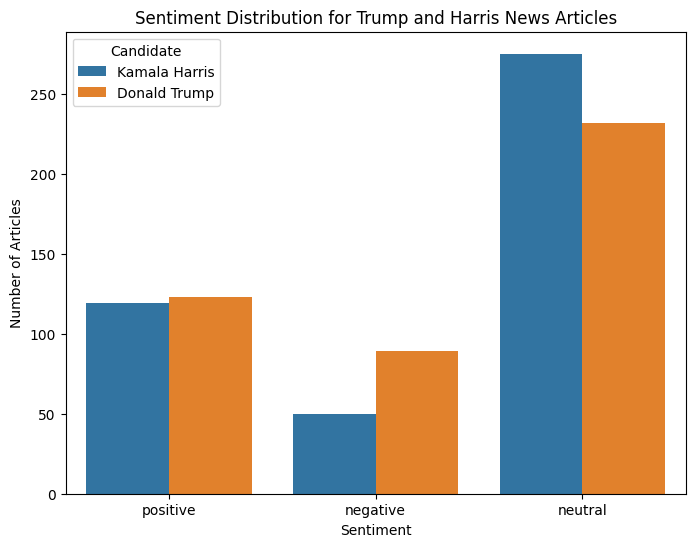

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

def calculate_sentiment_distribution(articles):
    """
    Calculate the number of positive, negative, and neutral articles based on compound sentiment scores.
    """
    sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}

    for article in articles:
        compound_score = sid.polarity_scores(article)['compound']
        
        if compound_score > 0.5:
            sentiments['positive'] += 1
        elif compound_score < -0.5:
            sentiments['negative'] += 1
        else:
            sentiments['neutral'] += 1
    
    return sentiments

# Calculate sentiment distributions for Harris and Trump articles
harris_sentiment_distribution = calculate_sentiment_distribution(clean_harris_articles)
trump_sentiment_distribution = calculate_sentiment_distribution(clean_trump_articles)

# Prepare data for plotting
sentiment_labels = ['positive', 'negative', 'neutral']
harris_counts = [harris_sentiment_distribution[sentiment] for sentiment in sentiment_labels]
trump_counts = [trump_sentiment_distribution[sentiment] for sentiment in sentiment_labels]

# Create a DataFrame for plotting
df_sentiment = pd.DataFrame({
    'Sentiment': sentiment_labels * 2,
    'Count': harris_counts + trump_counts,
    'Candidate': ['Kamala Harris'] * 3 + ['Donald Trump'] * 3
})

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Count', hue='Candidate', data=df_sentiment)
plt.title('Sentiment Distribution for Trump and Harris News Articles')
plt.ylabel('Number of Articles')
plt.show()



                                             article     candidate  \
0  angie nwandu launched shade room side hustle t...  Donald Trump   
1  donald trump presidential campaign ha spent pa...  Donald Trump   
2  donald trump dodged another bullet weekend sec...  Donald Trump   
3  donald trump ha targeted alleged assassination...  Donald Trump   
4  day apparent second attempted assassination do...  Donald Trump   

   trump_score  combined_score  kamala_score  
0       0.1280          0.1280           NaN  
1       0.3400          0.3400           NaN  
2      -0.5994         -0.5994           NaN  
3      -0.4019         -0.4019           NaN  
4      -0.8402         -0.8402           NaN  
       trump_score  combined_score  kamala_score
count   444.000000      888.000000    444.000000
mean      0.090775       -0.032743      0.156262
std       0.518837        0.503682      0.456277
min      -0.938200       -0.938200     -0.927400
25%      -0.361200       -0.476700     -0.051600
50%

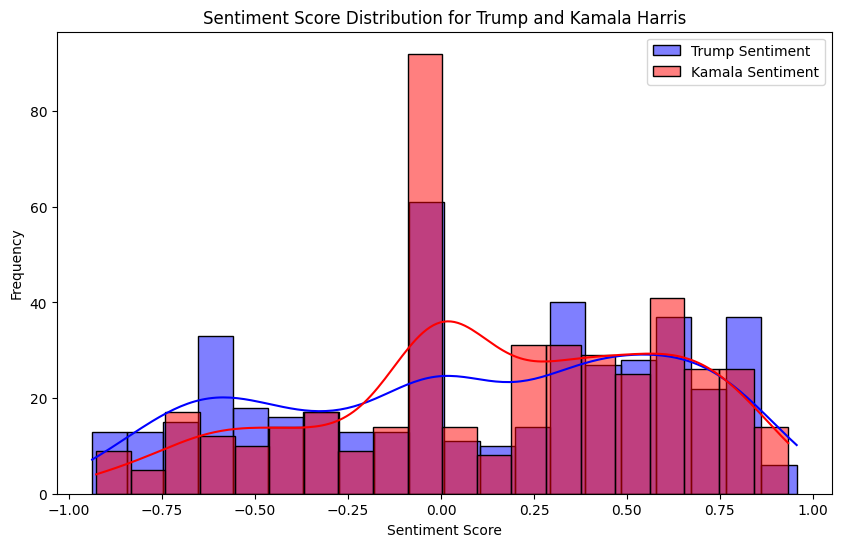

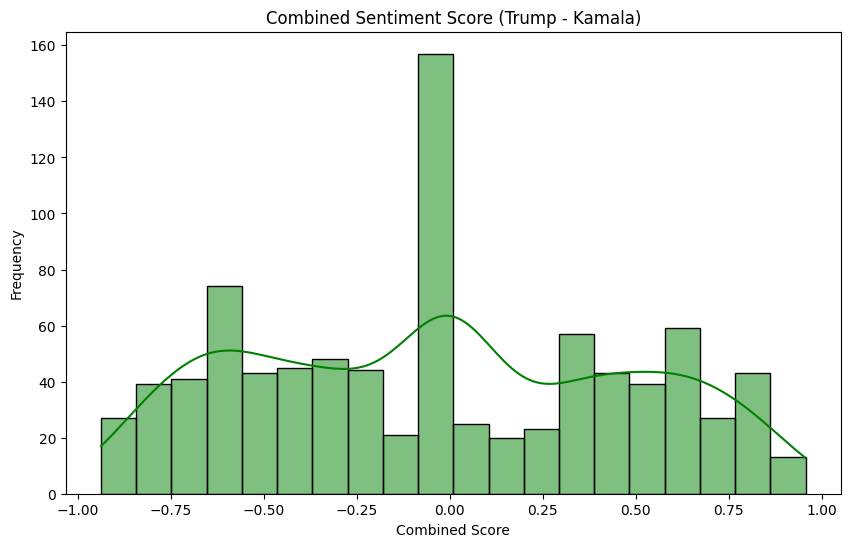

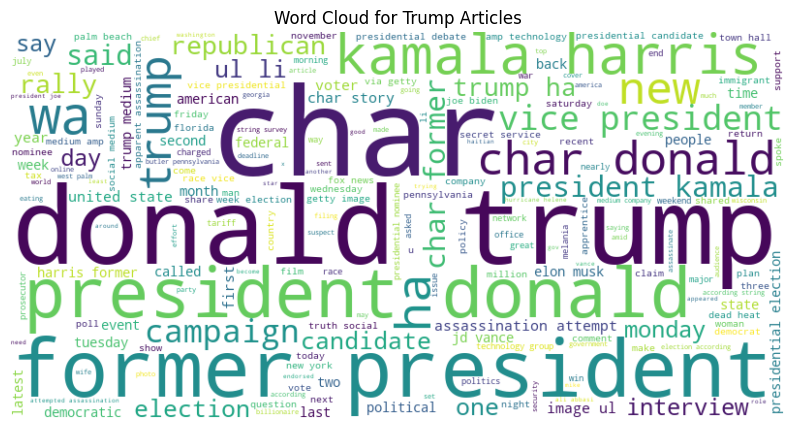

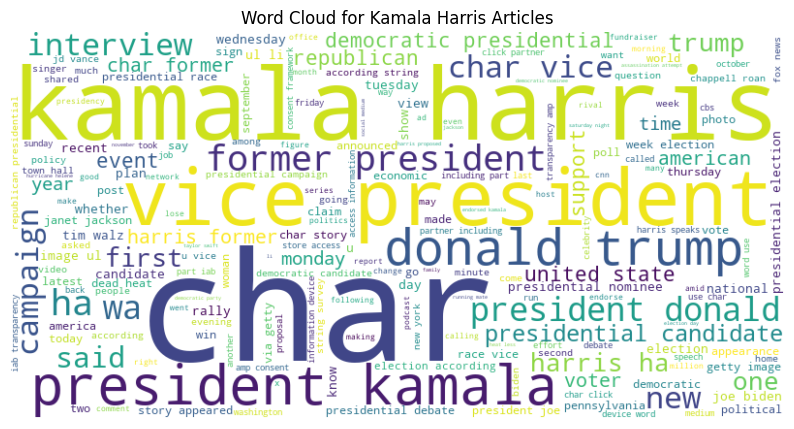

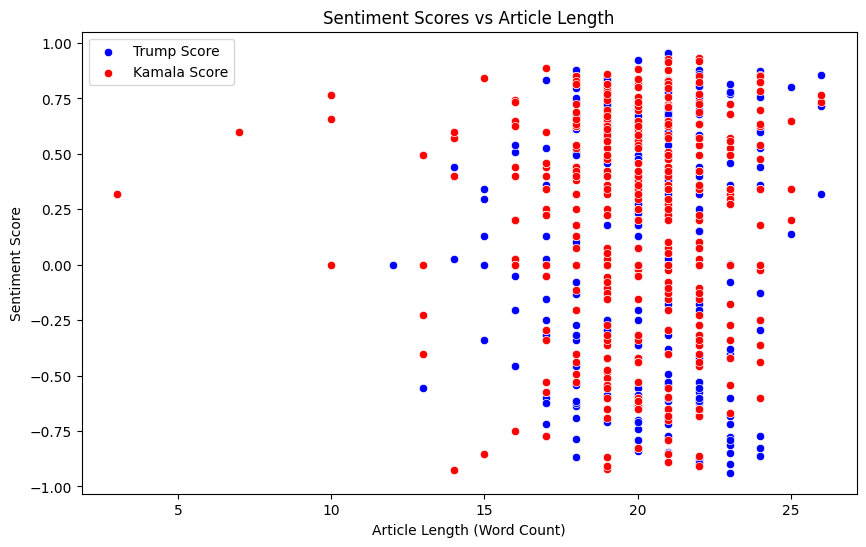

Most positive article for Trump: strong also remarkable cohn character despicable first two act become unlikely sympathetic character trump becomes trump strong known best role char
Most negative article for Trump: man arrested following apparent assassination attempt life former president donald trump wa charged morning two gun crime ryan wesley routh wa charged char
Most positive article for Kamala: following big win emmy award liza helping kamala harris tim walz win much important vote bear actress appear walz saturday rally char
Most negative article for Kamala: eric adam charged five count criminal offense including bribery wire fraud illegal campaign donation


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Assuming `trump_data` and `harris_data` have been processed already
# and contain 'article', 'score', and 'candidate' fields
df_trump = pd.DataFrame(trump_data)
df_harris = pd.DataFrame(harris_data)

# Rename the score columns to distinguish them for Trump and Kamala Harris
df_trump = df_trump.rename(columns={'score': 'trump_score'})
df_harris = df_harris.rename(columns={'score': 'kamala_score'})

# Add a 'combined_score' column to reflect sentiment difference (Trump - Kamala)
# Since df_trump only has trump_score and df_harris has kamala_score, we will merge them
# Assume articles are independent, so we use separate dataframes for each candidate
df_trump['combined_score'] = df_trump['trump_score']
df_harris['combined_score'] = -df_harris['kamala_score']  # Reverse sign for comparison

# Concatenate both DataFrames to form a complete dataset for analysis
df = pd.concat([df_trump, df_harris], ignore_index=True)

# Display the DataFrame to inspect the structure
print(df.head())

# Summary statistics for sentiment scores
print(df.describe())

# Count the number of articles
print(f"Total number of articles: {len(df)}")

# Count articles favoring Trump (combined_score > 0) vs Kamala (combined_score < 0)
trump_favored = (df['combined_score'] > 0).sum()
kamala_favored = (df['combined_score'] < 0).sum()
print(f"Articles favoring Trump: {trump_favored}")
print(f"Articles favoring Kamala: {kamala_favored}")

# Distribution of Trump and Kamala sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df_trump['trump_score'], color='blue', label='Trump Sentiment', kde=True, bins=20)
sns.histplot(df_harris['kamala_score'], color='red', label='Kamala Sentiment', kde=True, bins=20)
plt.title('Sentiment Score Distribution for Trump and Kamala Harris')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined sentiment score (Trump - Kamala)
plt.figure(figsize=(10, 6))
sns.histplot(df['combined_score'], color='green', kde=True, bins=20)
plt.title('Combined Sentiment Score (Trump - Kamala)')
plt.xlabel('Combined Score')
plt.ylabel('Frequency')
plt.show()

# Function to create word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds for Trump and Kamala mentions
trump_articles_text = " ".join(df_trump['article'])
kamala_articles_text = " ".join(df_harris['article'])

plot_wordcloud(trump_articles_text, "Word Cloud for Trump Articles")
plot_wordcloud(kamala_articles_text, "Word Cloud for Kamala Harris Articles")

df_trump['article_length'] = df_trump['article'].apply(lambda x: len(x.split()))
df_harris['article_length'] = df_harris['article'].apply(lambda x: len(x.split()))

# Plot sentiment scores vs article length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='article_length', y='trump_score', data=df_trump, label='Trump Score', color='blue')
sns.scatterplot(x='article_length', y='kamala_score', data=df_harris, label='Kamala Score', color='red')
plt.title('Sentiment Scores vs Article Length')
plt.xlabel('Article Length (Word Count)')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

# Find the most positive/negative articles for Trump and Kamala
most_positive_trump = df_trump.loc[df_trump['trump_score'].idxmax()]['article']
most_negative_trump = df_trump.loc[df_trump['trump_score'].idxmin()]['article']
most_positive_kamala = df_harris.loc[df_harris['kamala_score'].idxmax()]['article']
most_negative_kamala = df_harris.loc[df_harris['kamala_score'].idxmin()]['article']

print(f"Most positive article for Trump: {most_positive_trump}")
print(f"Most negative article for Trump: {most_negative_trump}")
print(f"Most positive article for Kamala: {most_positive_kamala}")
print(f"Most negative article for Kamala: {most_negative_kamala}")
